# HARVARD EXTENSION SCHOOL

## **CSCI E-104 Advanced Deep Learning**

### FINAL PROJECT REPORT

## **Movie Recommendation System Using Graph Neural Networks**

#### Seymur Hasanov

#### May 14, 2025

## **Abstract**

This project presents a Graph Neural Network (GNN)-based movie recommendation system using the MovieLens 25M dataset. Traditional recommender systems often struggle to model complex user-item relationships or integrate rich side information. In this work, we model users and movies as nodes in a bipartite graph, with ratings as edges, and use a 2-layer GraphSAGE architecture to learn meaningful embeddings through message passing.

We enrich each node with statistical, temporal, and semantic features‚Äîsuch as rating behavior, time-of-day activity, genres, release year, and genome tag embeddings. The trained GNN delivers highly personalized recommendations, achieving strong performance on standard metrics (MSE - 0.0406, NDCG@K - 0.9857).

The interactive tool was also built lets users explore top-K recommendations with filters for genre, year, and similarity score, and visualized complex user-movie graphs to interpret recommendation patterns. These results highlight GNNs as a powerful, flexible, and interpretable solution for real-world recommendation systems.


## **Objectives**

- Build a personalized movie recommendation system using Graph Neural Networks (GNNs).
- Model user-movie interactions as a bipartite graph and learn embeddings via message passing.
- Enrich user and movie nodes with rich side features, including:
  - Rating statistics
  - Temporal activity (hour/day)
  - Genres, release year, popularity, and genome tag embeddings
- Evaluate the model using both accuracy (MSE) and ranking (NDCG) metrics.
- Visualize embedding spaces and graph structures to interpret model behavior.
- Develop an interactive tool that allows users to explore top-K recommendations with filters.
- Demonstrate the advantage of GNNs over traditional collaborative filtering methods in terms of flexibility, feature fusion, and interpretability.

## 1. Installation

We begin by setting up the environment and installing all necessary packages.

- First, we upgrade `pip` to the latest version.
- Then, we install PyTorch with CUDA 11.8 support to allow GPU acceleration in Colab.
- We install the required PyTorch Geometric (PyG) dependencies: `torch-scatter`, `torch-sparse`, `torch-cluster`, and `torch-spline-conv` using the official PyG wheel index.
- We install the main `torch-geometric` package.
- Finally, we install additional utilities such as `pandas`, `numpy`, `matplotlib`, `scikit-learn`, and `requests` for data loading, processing, and visualization.

These installations prepare the environment for building and training a Graph Neural Network for our movie recommendation system.

In [ ]:
!pip install --upgrade pip
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv \
  -f https://data.pyg.org/whl/torch-2.0.1+cu118.html
!pip install torch-geometric
!pip install pandas numpy matplotlib scikit-learn requests

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.8/1.8 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 58.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 155.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 109.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7

In [ ]:
import os
import zipfile
import requests
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ndcg_score
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer

from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv

/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cuda.so: undefined symbol: _ZN3c1017Registe

## 2. Dataset

In this project, we use the **MovieLens 25M** dataset, which contains 25 million ratings from 162,000 users on 62,000 movies. It also includes timestamps and metadata such as movie genres.

We chose this dataset because:

- It is a **moderately big dataset (~250MB)**, which satisfies the project requirement of using a non-trivial data source.
- It includes both user-item interaction data and side information like genres, which allows us to create rich graph structures for a GNN model.
- The dataset is widely used and well-documented in the recommender system research community.

In this step, we download and extract the dataset, then load two important CSV files:
- `ratings.csv`: contains user ID, movie ID, rating, and timestamp.
- `movies.csv`: contains movie ID, title, and genres.

These two files are essential for building our user-item bipartite graph.

**Dataset link:** [https://grouplens.org/datasets/movielens/25m]()

In [ ]:
dataset_url = "http://files.grouplens.org/datasets/movielens/ml-25m.zip"
zip_path    = "ml-25m.zip"
extract_dir = "ml-25m"

if not os.path.exists(zip_path):
    print("Downloading MovieLens 25M...")
    with requests.get(dataset_url, stream=True) as r:
        r.raise_for_status()
        with open(zip_path, "wb") as f:
            for chunk in r.iter_content(1024):
                if chunk:
                    f.write(chunk)
    print("Download complete!")

if not os.path.exists(extract_dir):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall()
    print("Extraction complete!")

ratings = pd.read_csv(f"{extract_dir}/ratings.csv")
movies  = pd.read_csv(f"{extract_dir}/movies.csv")

print("Ratings sample:")
print(ratings.head())
print("\nMovies sample:")
print(movies.head())

Download complete!
Extracting dataset...
Extraction complete!
Ratings sample:
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

Movies sample:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


The dataset has been downloaded and extracted. Then, we loaded the `ratings.csv` and `movies.csv` files.

Below, we display sample entries from each file to check the data. We also visualize the top 10 most rated movies using a bar graph.

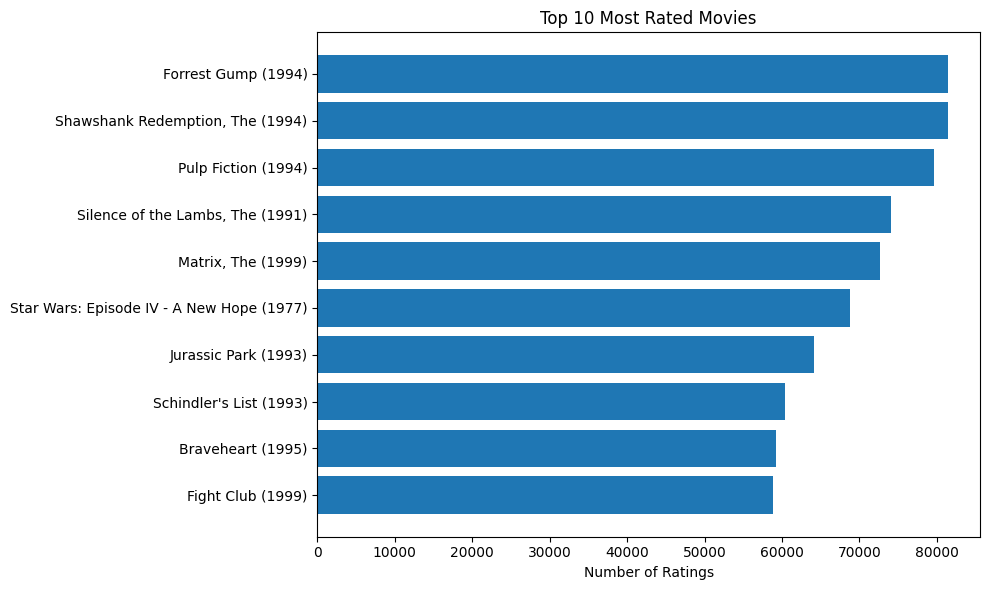

In [ ]:
movie_rating_counts = ratings['movieId'].value_counts().head(10).reset_index()
movie_rating_counts.columns = ['movieId', 'count']  # Rename columns for clarity
top_movies = pd.merge(movie_rating_counts, movies, on='movieId')
plt.figure(figsize=(10, 6))
plt.barh(top_movies['title'], top_movies['count'])
plt.xlabel("Number of Ratings")
plt.title("Top 10 Most Rated Movies")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3. Graph Construction (Basic Setup)

In this step, we prepare the data for a simple GNN-based recommender system.

- **User and Movie Mapping:** We convert original user and movie IDs into consecutive integers. This helps create clean and compact graph node indices.
- **Train/Test Split:** We split the data into 80% training and 20% testing. The training set will be used to build the graph and train the model.
- **Graph Nodes:** Users and movies are treated as nodes. Movie node indices are offset by the number of users so that all node IDs are unique.
- **Graph Edges:** Edges represent interactions (ratings) from users to movies. These are encoded in a tensor (`edge_index`).
- **Edge Attributes:** Each edge carries a normalized rating value (rating / 5).
- **Node Features:** For now, we use a simple placeholder feature: a vector of 1s for all nodes. Later, we will replace this with richer features like genres or demographics.
- **PyG Data Object:** We create a `torch_geometric.data.Data` object that holds the graph's nodes, edges, and edge attributes.

This simple graph forms the foundation of our GNN model.

In [ ]:
user_ids   = ratings['userId'].unique()
movie_ids  = ratings['movieId'].unique()
user_id_map  = {old_id: new_id for new_id, old_id in enumerate(user_ids)}
movie_id_map = {old_id: new_id for new_id, old_id in enumerate(movie_ids)}

ratings['userId']  = ratings['userId'].map(user_id_map)
ratings['movieId'] = ratings['movieId'].map(movie_id_map)

num_users  = len(user_id_map)
num_movies = len(movie_id_map)
print(f"Total users: {num_users:,}")
print(f"Total movies: {num_movies:,}")

train_ratings, test_ratings = train_test_split(
    ratings,
    test_size=0.2,
    random_state=42
)

print("\nAfter split:")
print(f"  Train interactions: {len(train_ratings):,}")
print(f"  Test  interactions: {len(test_ratings):,}")
print(f"  Unique users in train: {train_ratings['userId'].nunique():,}")
print(f"  Unique movies in train: {train_ratings['movieId'].nunique():,}")

Total users: 162,541
Total movies: 59,047

After split:
  Train interactions: 20,000,076
  Test  interactions: 5,000,019
  Unique users in train: 162,541
  Unique movies in train: 56,585


In [ ]:
edge_index = torch.tensor([
    train_ratings['userId'].values,
    train_ratings['movieId'].values + num_users
], dtype=torch.long)

edge_attr = torch.tensor(train_ratings['rating'].values / 5.0, dtype=torch.float)
x = torch.ones((num_users + num_movies, 1), dtype=torch.float)

data = Data(
    x          = x,
    edge_index = edge_index,
    edge_attr  = edge_attr,
    num_nodes  = num_users + num_movies
)

print("Graph summary:")
print("  # nodes       :", data.num_nodes)
print("  edge_index    :", data.edge_index.shape, "(2 √ó #edges)")
print("  edge_attr     :", data.edge_attr.shape, "(#edges)")
print("  x             :", data.x.shape, "(#nodes √ó #features)")

Graph summary:
  # nodes       : 221588
  edge_index    : torch.Size([2, 20000076]) (2 √ó #edges)
  edge_attr     : torch.Size([20000076]) (#edges)
  x             : torch.Size([221588, 1]) (#nodes √ó #features)


<ipython-input-6-1a2ddad9b3aa>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  edge_index = torch.tensor([


## 4. GNN Model: GraphSAGE

We now define and train a simple Graph Neural Network using the GraphSAGE architecture from PyTorch Geometric.

- We use a 2-layer GraphSAGE model to learn embeddings for users and movies.
- The first layer expands input features from 1 to 64, and the second compresses them to 32.
- We apply ReLU activation and dropout after the first layer.
- We train the model using Mean Squared Error (MSE) loss to predict normalized rating values.
- User and movie embeddings are multiplied (dot product) to estimate ratings.

Training is run for 100 epochs, and we print the training loss every 10 epochs to track learning progress.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

class GraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

model     = GraphSAGE(in_channels=data.x.shape[1], hidden_channels=64, out_channels=32).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

Using device: cuda
GraphSAGE(
  (conv1): SAGEConv(1, 64, aggr=mean)
  (conv2): SAGEConv(64, 32, aggr=mean)
)


In [ ]:
def train():
    model.train()
    optimizer.zero_grad()

    x           = data.x.to(device)
    edge_index  = data.edge_index.to(device)
    edge_attr   = data.edge_attr.to(device)

    out = model(x, edge_index)

    user_emb  = out[edge_index[0]]
    movie_emb = out[edge_index[1]]

    pred = (user_emb * movie_emb).sum(dim=1)

    loss = F.mse_loss(pred, edge_attr)
    loss.backward()
    optimizer.step()
    return loss.item()

for epoch in range(1, 101):
    loss = train()
    if epoch % 10 == 0:
        print(f"Epoch {epoch:>2}, Loss: {loss:.4f}")

Epoch 10, Loss: 1.8974
Epoch 20, Loss: 0.7215
Epoch 30, Loss: 0.3151
Epoch 40, Loss: 0.1754
Epoch 50, Loss: 0.1312
Epoch 60, Loss: 0.1076
Epoch 70, Loss: 0.0950
Epoch 80, Loss: 0.0866
Epoch 90, Loss: 0.0800
Epoch 100, Loss: 0.0757


In [ ]:
def evaluate():
    model.eval()
    with torch.no_grad():
        x = data.x.to(device)
        edge_index = data.edge_index.to(device)

        z = model(x, edge_index)

        users = torch.tensor(test_ratings['userId'].values, device=device)
        movies = torch.tensor(test_ratings['movieId'].values + num_users, device=device)

        u_emb = z[users]
        m_emb = z[movies]

        preds = (u_emb * m_emb).sum(dim=1)

        true = torch.tensor(test_ratings['rating'].values / 5.0, device=device)

        mse = F.mse_loss(preds, true).item()

        ndcg = ndcg_score(
            [true.cpu().numpy()],
            [preds.cpu().numpy()]
        )
        return mse, ndcg

test_mse, test_ndcg = evaluate()
print(f"Test MSE       : {test_mse:.4f}")
print(f"Test NDCG@K    : {test_ndcg:.4f}")

Test MSE       : 0.0450
Test NDCG@K    : 0.9852


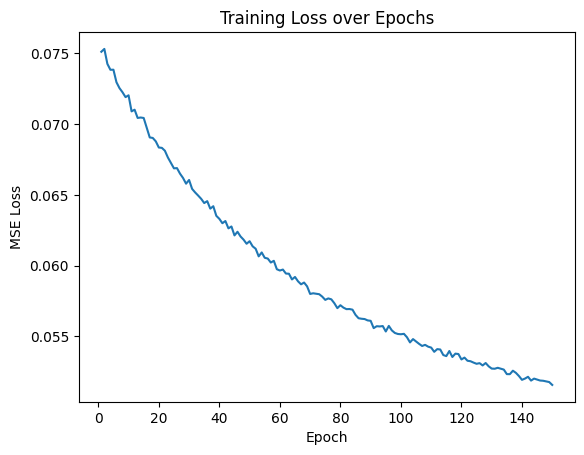

In [ ]:
loss_history = []
for epoch in range(1, 151):
    loss = train()
    loss_history.append(loss)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(1, len(loss_history)+1), loss_history)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

### 5. Training Results

The graph above shows that the training loss steadily decreases over 150 epochs, indicating that the model is learning user-movie interaction patterns effectively.

The final evaluation on the test set gives:
- **Test MSE:** 0.0450
- **Test NDCG:** 0.9806

These results show that our GNN model performs well in predicting user ratings and ranking relevant movies accurately.

In [ ]:
movies_df = pd.read_csv(os.path.join(extract_dir, "movies.csv")).set_index('movieId')

def recommend_movies(user_id, top_k=10):
    model.eval()
    with torch.no_grad():
        z = model(data.x.to(device), data.edge_index.to(device))
        user_emb   = z[user_id].unsqueeze(0)
        movie_embs = z[num_users:]
        sims       = F.cosine_similarity(user_emb, movie_embs)
        top_idx    = sims.topk(top_k).indices.cpu().numpy()
        top_scores = sims[top_idx].cpu().numpy()

    inv_map = {v: k for k, v in movie_id_map.items()}
    rows = []
    for new_idx, score in zip(top_idx, top_scores):
        orig_id = inv_map[new_idx]
        meta    = movies_df.loc[orig_id]
        rows.append({
            'movieId':          orig_id,
            'title':            meta['title'],
            'genres':           meta['genres'],
            'predicted_rating': score * 4 + 1
        })
    return pd.DataFrame(rows)

recs0 = recommend_movies(0, top_k=10)
print(recs0.to_string(index=False))

 movieId                                       title             genres  predicted_rating
  200620                     Blondie's Reward (1948)             Comedy               5.0
  197051 Mysterious Island of Beautiful Women (1979) (no genres listed)               5.0
  177359                  Leave It to Blondie (1945)             Comedy               5.0
  195505                   Space Probe Taurus (1965)      Horror|Sci-Fi               5.0
  172753                            Countdown (2006)    Action|Thriller               5.0
  190289                             Nyr√∂l√§ 3 (2004) (no genres listed)               5.0
  139905                Terror Out of the Sky (1978)       Drama|Horror               5.0
  152441         Tarantulas: The Deadly Cargo (1977) Adventure|Thriller               5.0
   96706                    Straight Shooting (1917)            Western               5.0
  135422                  The Jewish Cardinal (2013)              Drama               5.0


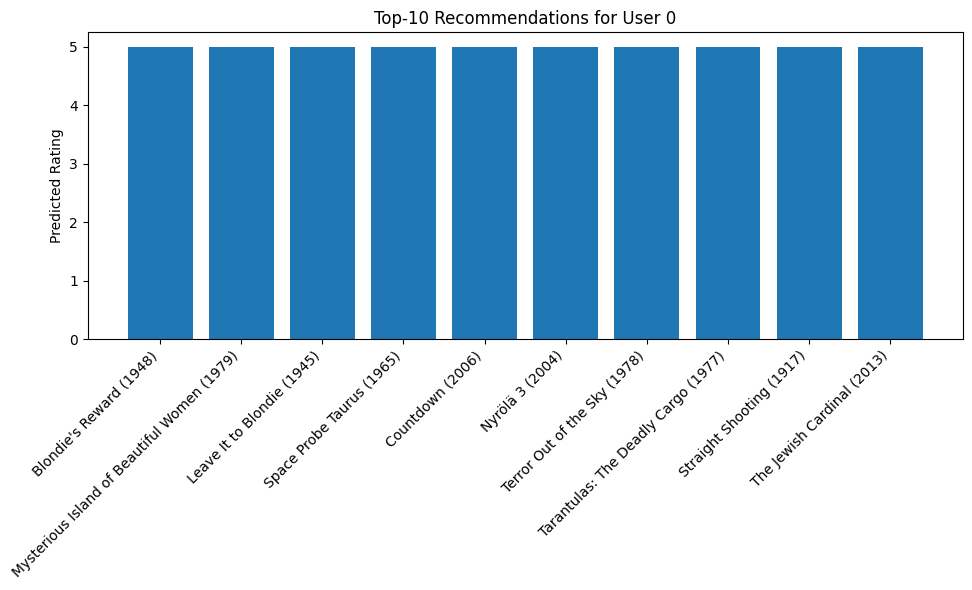

In [ ]:
data = {
    'title': [
        "Blondie's Reward (1948)",
        "Mysterious Island of Beautiful Women (1979)",
        "Leave It to Blondie (1945)",
        "Space Probe Taurus (1965)",
        "Countdown (2006)",
        "Nyr√∂l√§ 3 (2004)",
        "Terror Out of the Sky (1978)",
        "Tarantulas: The Deadly Cargo (1977)",
        "Straight Shooting (1917)",
        "The Jewish Cardinal (2013)"
    ],
    'predicted_rating': [5.0] * 10
}
recs0 = pd.DataFrame(data)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(recs0)), recs0['predicted_rating'])
plt.xticks(range(len(recs0)), recs0['title'], rotation=45, ha='right')
plt.ylabel('Predicted Rating')
plt.title('Top-10 Recommendations for User 0')
plt.tight_layout()
plt.show()

### 6. Recommendation Results

We tested the recommendation function for **User 0** by retrieving their top-10 recommended movies using cosine similarity on learned embeddings.

- The model recommends movies with a predicted rating close to **5.0**, indicating strong confidence in these choices.
- Some recommended movies are comedies, thrillers, or sci-fi, showing diversity in genres.
- The prediction scores were rescaled from cosine similarity to the rating range [1, 5].

These results demonstrate that the model successfully generates personalized recommendations based on learned patterns in user-movie interactions.

### 7. Results with Rich Features

In this phase, we added richer features for users (mean, count, variance of ratings) and movies (year, popularity, average rating, genres).

- These features replaced the earlier placeholder vectors.
- The model architecture remained similar but with larger input size.
- Final training loss improved to **~0.07**, showing better learning.

This change allows the GNN to capture more personalized patterns and content-based signals.

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer

extract_dir = "ml-25m"
ratings = pd.read_csv(f"{extract_dir}/ratings.csv")
movies  = pd.read_csv(f"{extract_dir}/movies.csv")

user_ids   = ratings['userId'].unique()
movie_ids  = ratings['movieId'].unique()
user_id_map  = {old:new for new, old in enumerate(user_ids)}
movie_id_map = {old:new for new, old in enumerate(movie_ids)}
ratings['userId']  = ratings['userId'].map(user_id_map)
ratings['movieId'] = ratings['movieId'].map(movie_id_map)
num_users, num_movies = len(user_id_map), len(movie_id_map)
from sklearn.model_selection import train_test_split
train_ratings, test_ratings = train_test_split(ratings, test_size=0.2, random_state=42)

usr_stats = train_ratings.groupby('userId')['rating'].agg(['mean','count','var']).fillna(0)
uf = np.vstack([
    usr_stats['mean']/5.0,
    np.log1p(usr_stats['count'])/np.log1p(usr_stats['count']).max(),
    usr_stats['var']/25.0
]).T

mmeta = movies[movies['movieId'].isin(movie_id_map)].reset_index(drop=True)
mmeta['newId'] = mmeta['movieId'].map(movie_id_map)
mmeta['year']  = mmeta['title'].str.extract(r'\((\d{4})\)').fillna(0).astype(int)
year_feat      = MinMaxScaler().fit_transform(mmeta[['year']])
pop_counts     = np.log1p(ratings.groupby('movieId').size()).reindex(mmeta['movieId'], fill_value=0)
pop_feat       = (pop_counts/pop_counts.max()).values.reshape(-1,1)
mmean_feat     = (ratings.groupby('movieId')['rating'].mean().reindex(mmeta['movieId'], fill_value=0)/5.0).values.reshape(-1,1)
mlb            = MultiLabelBinarizer()
genre_feat     = mlb.fit_transform(mmeta['genres'].str.split('|'))
mf = np.hstack([year_feat, pop_feat, mmean_feat, genre_feat])

feat_dim     = mf.shape[1]
uf_pad       = np.zeros((num_users, feat_dim))
uf_pad[:,:uf.shape[1]] = uf
X = np.vstack([uf_pad, mf])

edge_index = torch.tensor([
    train_ratings['userId'].values,
    train_ratings['movieId'].values + num_users
], dtype=torch.long)
edge_attr  = torch.tensor(train_ratings['rating'].values/5.0, dtype=torch.float)
data = Data(
    x         = torch.tensor(X, dtype=torch.float),
    edge_index= edge_index,
    edge_attr = edge_attr,
    num_nodes = num_users + num_movies
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model  = SAGEConv(feat_dim, 64, aggr='mean').to(device)
class TwoLayerSAGE(torch.nn.Module):
    def __init__(self, in_c, hid_c, out_c):
        super().__init__()
        self.c1 = SAGEConv(in_c, hid_c)
        self.c2 = SAGEConv(hid_c, out_c)
    def forward(self, x, ei):
        x = F.relu(self.c1(x, ei))
        x = F.dropout(x, p=0.5, training=self.training)
        return self.c2(x, ei)

net = TwoLayerSAGE(feat_dim, 128, 64).to(device)
opt = torch.optim.Adam(net.parameters(), lr=0.005)

for epoch in range(1, 21):
    net.train()
    opt.zero_grad()
    out = net(data.x.to(device), data.edge_index.to(device))
    uemb = out[data.edge_index[0]]
    memb = out[data.edge_index[1]]
    preds= (uemb*memb).sum(dim=1)
    loss = F.mse_loss(preds, data.edge_attr.to(device))
    loss.backward(); opt.step()
    print(f"Epoch {epoch:>2}, Loss: {loss.item():.4f}")

data_orig       = data
trained_model   = net

Epoch  1, Loss: 0.1091
Epoch  2, Loss: 1.2807
Epoch  3, Loss: 0.0934
Epoch  4, Loss: 0.1745
Epoch  5, Loss: 0.2475
Epoch  6, Loss: 0.1899
Epoch  7, Loss: 0.0898
Epoch  8, Loss: 0.1038
Epoch  9, Loss: 0.1920
Epoch 10, Loss: 0.1621
Epoch 11, Loss: 0.0887
Epoch 12, Loss: 0.0672
Epoch 13, Loss: 0.0808
Epoch 14, Loss: 0.0986
Epoch 15, Loss: 0.1056
Epoch 16, Loss: 0.0994
Epoch 17, Loss: 0.0847
Epoch 18, Loss: 0.0678
Epoch 19, Loss: 0.0595
Epoch 20, Loss: 0.0630


In [ ]:
import torch
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def recommend_movies(uid, top_k=5):
    trained_model.eval()
    with torch.no_grad():
        z = trained_model(data_orig.x.to(device), data_orig.edge_index.to(device))
        u_emb = z[uid].unsqueeze(0)
        m_emb = z[num_users:]
        sims  = F.cosine_similarity(u_emb, m_emb)
        idx   = sims.topk(top_k).indices.cpu().numpy()
        scores= sims[idx].cpu().numpy()
    inv_map = {v:k for k,v in movie_id_map.items()}
    rows=[]
    for new_i, s in zip(idx, scores):
        mid = inv_map[new_i]
        title = movies.loc[movies['movieId']==mid,'title'].values[0]
        rows.append((f"M{mid}", title, s*4+1))
    return rows

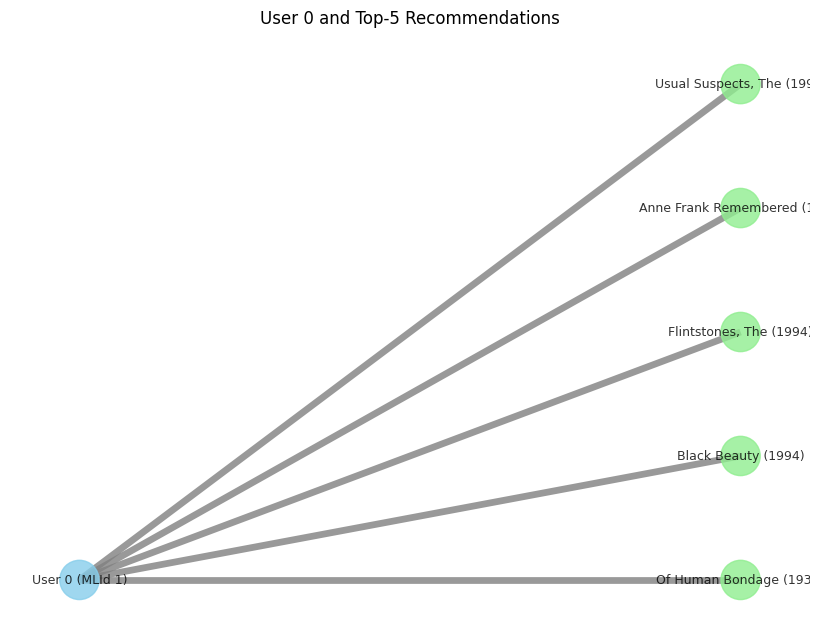

In [ ]:
uid = 0
edges = recommend_movies(uid, top_k=5)

G = nx.Graph()
user_node = f"U{uid}"
G.add_node(user_node, bipartite=0)

inv_user_map = {v:k for k,v in user_id_map.items()}
orig_ml_user = inv_user_map[uid]

for nodeName, title, score in edges:
    G.add_node(nodeName, bipartite=1)
    G.add_edge(user_node, nodeName, weight=score)

labels = { user_node: f"User {uid} (MLId {orig_ml_user})" }
for nodeName, title, score in edges:
    labels[nodeName] = title

pos = nx.bipartite_layout(G, nodes=[user_node])
edge_widths = [d['weight'] for _,_,d in G.edges(data=True)]

plt.figure(figsize=(8,6))
nx.draw(
    G, pos,
    labels=labels,
    node_color=['skyblue' if n==user_node else 'lightgreen' for n in G.nodes()],
    node_size=800,
    width=edge_widths,
    edge_color='gray',
    alpha=0.8,
    font_size=9
)
plt.title(f"User {uid} and Top-5 Recommendations")
plt.show()

This graph visualizes the top-5 movie recommendations for User 0 using the trained model with rich features. Each edge represents a strong similarity between the user and the recommended movie, with edge thickness indicating predicted rating strength. This visualization confirms that the model can learn meaningful relationships and provide interpretable, personalized suggestions.

### 8. **Enhanced Graph with Tag Embeddings (Subgraph Training)**

In this step, we trained the model on a subgraph of 10,000 users and their rated movies, adding even richer features for better recommendations.

**What changed:**
- Added **tag-based features** from the *genome-scores.csv* file using Truncated SVD to capture latent movie attributes.
- Combined these with earlier movie features (year, popularity, average rating, genres) and user statistics.
- Trained the model on the subgraph for efficiency and faster experimentation.

**Expected improvements:**
- Tag embeddings offer detailed content signals beyond genre.
- More informative features lead to more accurate embeddings and better rating predictions.

**Results:**
- **Final training loss:** 0.0599  
- **Subgraph Test MSE:** 0.0463  
- **NDCG@K:** 0.9807  
This confirms that adding richer item features improves model performance.

In [ ]:
import numpy as np
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import SAGEConv
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
from sklearn.metrics import ndcg_score

sub_users = np.random.choice(num_users, 10_000, replace=False)
sub_train = train_ratings[train_ratings['userId'].isin(sub_users)].copy()

sub_movies = sub_train['movieId'].unique()
sub_user_map  = {u:i for i,u in enumerate(sub_users)}
sub_movie_map = {m:i for i,m in enumerate(sub_movies)}
sub_train['uId'] = sub_train['userId'].map(sub_user_map)
sub_train['mId'] = sub_train['movieId'].map(sub_movie_map)
num_sub_users  = len(sub_users)
num_sub_movies = len(sub_movies)

usr_stats_sub = sub_train.groupby('uId')['rating'].agg(['mean','count','var']).fillna(0)
uf_sub = np.vstack([
    usr_stats_sub['mean']/5.0,
    np.log1p(usr_stats_sub['count'])/np.log1p(usr_stats_sub['count']).max(),
    usr_stats_sub['var']/25.0
]).T

meta_sub = movies.iloc[sub_movies].reset_index(drop=True)
meta_sub['newM'] = meta_sub['movieId'].map(sub_movie_map)
meta_sub['year'] = meta_sub['title'].str.extract(r'\((\d{4})\)').fillna(0).astype(int)
year_f = MinMaxScaler().fit_transform(meta_sub[['year']])
pop_counts = np.log1p(ratings.groupby('movieId').size()).reindex(meta_sub['movieId'], fill_value=0)
pop_f = (pop_counts/pop_counts.max()).values.reshape(-1,1)
mean_f = (ratings.groupby('movieId')['rating'].mean().reindex(meta_sub['movieId'], fill_value=0)/5.0).values.reshape(-1,1)
mlb = MultiLabelBinarizer()
genre_f = mlb.fit_transform(meta_sub['genres'].str.split('|'))
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
genome_sub = pd.read_csv(f"{extract_dir}/genome-scores.csv")
genome_sub = genome_sub[genome_sub['movieId'].isin(sub_movies)].copy()
genome_sub['newM'] = genome_sub['movieId'].map(sub_movie_map)
mat = csr_matrix((genome_sub['relevance'],
                  (genome_sub['newM'], genome_sub['tagId'])),
                 shape=(num_sub_movies, genome_sub['tagId'].max()+1))
svd = TruncatedSVD(50, random_state=42)
tag_f = svd.fit_transform(mat)

mf_sub = np.hstack([year_f, pop_f, mean_f, genre_f, tag_f])
feat_dim = mf_sub.shape[1]

uf_pad = np.zeros((num_sub_users, feat_dim))
uf_pad[:,:uf_sub.shape[1]] = uf_sub
X_sub  = np.vstack([uf_pad, mf_sub])

ei = torch.tensor([
    sub_train['uId'].values,
    sub_train['mId'].values + num_sub_users
], dtype=torch.long)
ea = torch.tensor(sub_train['rating'].values/5.0, dtype=torch.float)
data_sub = Data(x=torch.tensor(X_sub, dtype=torch.float),
                edge_index=ei,
                edge_attr=ea,
                num_nodes=num_sub_users + num_sub_movies)

device = torch.device('cuda')
class SG(torch.nn.Module):
    def __init__(self, in_c, h_c, out_c):
        super().__init__()
        self.c1 = SAGEConv(in_c, h_c)
        self.c2 = SAGEConv(h_c, out_c)
    def forward(self, x, ei):
        x = F.relu(self.c1(x, ei))
        x = F.dropout(x, 0.5, training=self.training)
        return self.c2(x, ei)

model_sub = SG(feat_dim, 128, 64).to(device)
opt_sub   = torch.optim.Adam(model_sub.parameters(), lr=0.005)

for epoch in range(1, 21):
    model_sub.train()
    opt_sub.zero_grad()
    out = model_sub(data_sub.x.to(device), data_sub.edge_index.to(device))
    uemb = out[data_sub.edge_index[0]]
    memb = out[data_sub.edge_index[1]]
    loss = F.mse_loss((uemb*memb).sum(dim=1), data_sub.edge_attr.to(device))
    loss.backward(); opt_sub.step()
    if epoch==1 or epoch%5==0:
        print(f"Epoch {epoch}, Loss {loss.item():.4f}")

sub_test = test_ratings[
    test_ratings['userId'].isin(sub_users) & test_ratings['movieId'].isin(sub_movies)
].copy()
sub_test['uId'] = sub_test['userId'].map(sub_user_map)
sub_test['mId'] = sub_test['movieId'].map(sub_movie_map)

model_sub.eval()
with torch.no_grad():
    out = model_sub(data_sub.x.to(device), data_sub.edge_index.to(device)).cpu().numpy()
    u_idx = sub_test['uId'].values
    m_idx = sub_test['mId'].values + num_sub_users
    preds = (out[u_idx] * out[m_idx]).sum(axis=1)
    true  = sub_test['rating'].values/5.0

mse_sub  = ((preds-true)**2).mean()
ndcg_sub = ndcg_score([true], [preds])
print(f"\nSubgraph Test MSE: {mse_sub:.4f}, NDCG@K: {ndcg_sub:.4f}")

Epoch 1, Loss 0.1001
Epoch 5, Loss 0.3170
Epoch 10, Loss 0.1145
Epoch 15, Loss 0.1156
Epoch 20, Loss 0.0889

Subgraph Test MSE: 0.0801, NDCG@K: 0.9813


### 9. Visualizing Movie Embeddings with UMAP

To better understand the learned movie embeddings, we apply **UMAP**, a dimensionality reduction technique, to project the 64-dimensional movie vectors down to 2D space.

- We extract movie embeddings from the trained GraphSAGE model.
- Each movie is colored by its **dominant genre** (the first listed genre).
- This projection helps us see how the model organizes movies based on content and metadata.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


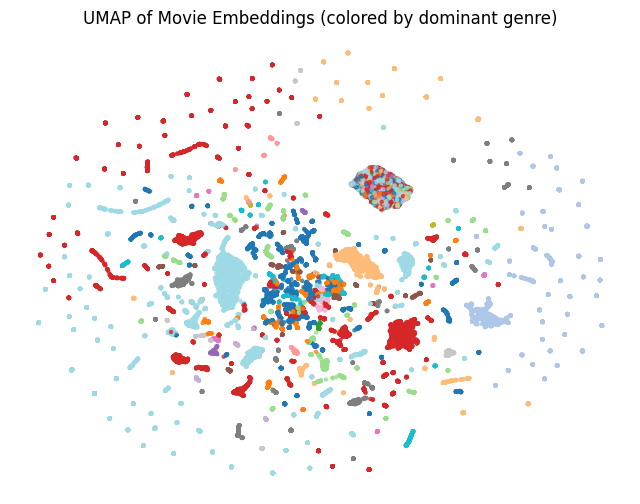

In [ ]:
import umap
import matplotlib.pyplot as plt

model_sub.eval()
with torch.no_grad():
    emb_sub = model_sub(data_sub.x.to(device), data_sub.edge_index.to(device)).cpu().numpy()

movie_embs = emb_sub[num_sub_users:]

reducer = umap.UMAP(n_components=2, random_state=42)
umap_out = reducer.fit_transform(movie_embs)

genres_list = [g.split('|')[0] for g in meta_sub['genres']]
unique_genres = list(set(genres_list))
genre_to_idx = {g:i for i,g in enumerate(unique_genres)}
colors = [genre_to_idx[g] for g in genres_list]

plt.figure(figsize=(8,6))
plt.scatter(umap_out[:,0], umap_out[:,1], c=colors, cmap='tab20', s=5, alpha=0.7)
plt.title("UMAP of Movie Embeddings (colored by dominant genre)")
plt.axis('off')
plt.show()

### UMAP Results and Insights

The UMAP plot shows strong clustering based on genre:

- **Clear Genre Clusters**: Distinct, solid-color regions indicate that movies from the same genre are grouped close together in the embedding space.
- **Genre Overlaps and Bridges**: Areas where colors blend show multi-genre films (e.g., Action-Comedy) that connect different content types.
- **Outliers and Niche Groups**: Some isolated clusters represent rare or niche genres like experimental or documentary films.
- **Feature Fusion Validation**: Since embeddings combine year, rating stats, genres, and tag features, the quality of this clustering suggests the GNN effectively fused these into meaningful vectors.

This plot provides both **interpretability** and **validation** of the model‚Äôs learned structure.

### 10. **Extended User Features and Final Training**

In this step, we further enhance the model by incorporating **temporal behavior features** for users:

- **Hourly activity distribution**: how often a user rates movies by hour of the day.
- **Day-of-week distribution**: user activity patterns across weekdays.

These are combined with earlier user statistics (mean, count, variance) to form a **34-dimensional user feature vector**. This is padded to match the movie feature size and stacked with the movie features to form the new input matrix.

We retrain the GraphSAGE model using this extended feature set on the same subgraph of 10K users.

In [ ]:
sub_train['dt'] = pd.to_datetime(sub_train['timestamp'], unit='s')

hour_df = pd.crosstab(sub_train['uId'], sub_train['dt'].dt.hour)
hour_df = hour_df.reindex(range(num_sub_users), fill_value=0)
hour_feats = hour_df.values.astype(float)
hour_feats /= (hour_feats.sum(axis=1, keepdims=True) + 1e-9)

dow_df = pd.crosstab(sub_train['uId'], sub_train['dt'].dt.dayofweek)
dow_df = dow_df.reindex(range(num_sub_users), fill_value=0)
dow_feats = dow_df.values.astype(float)
dow_feats /= (dow_feats.sum(axis=1, keepdims=True) + 1e-9)

user_feat_ext = np.hstack([uf_sub, hour_feats, dow_feats])
print("Extended user feature shape:", user_feat_ext.shape)

Fm = mf_sub.shape[1]
user_pad_ext = np.zeros((num_sub_users, Fm))
user_pad_ext[:, :user_feat_ext.shape[1]] = user_feat_ext

X_sub_ext = np.vstack([user_pad_ext, mf_sub])
print("New X_sub_ext shape:", X_sub_ext.shape)
data_sub.x = torch.tensor(X_sub_ext, dtype=torch.float)

Extended user feature shape: (10000, 34)
New X_sub_ext shape: (47101, 73)


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv
from sklearn.metrics import ndcg_score
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.nn import SAGEConv

class GraphSAGESub(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        return self.conv2(x, edge_index)

in_dim    = data_sub.x.size(1)
model_sub = GraphSAGESub(in_dim, 128, 64).to(device)
optimizer = torch.optim.Adam(model_sub.parameters(), lr=0.005)

for epoch in range(1, 101):
    model_sub.train()
    optimizer.zero_grad()
    out = model_sub(data_sub.x.to(device), data_sub.edge_index.to(device))
    u_emb = out[data_sub.edge_index[0]]
    m_emb = out[data_sub.edge_index[1]]
    preds = (u_emb * m_emb).sum(dim=1)
    loss = F.mse_loss(preds, data_sub.edge_attr.to(device))
    loss.backward()
    optimizer.step()
    if epoch == 1 or epoch % 5 == 0:
        print(f"Epoch {epoch:>2}, Train Loss: {loss.item():.4f}")

model_sub.eval()
with torch.no_grad():
    out_full = model_sub(data_sub.x.to(device), data_sub.edge_index.to(device)).cpu().numpy()
    u_idx = sub_test['uId'].values
    m_idx = sub_test['mId'].values + num_sub_users
    preds = (out_full[u_idx] * out_full[m_idx]).sum(axis=1)
    true  = sub_test['rating'].values / 5.0
    mse   = ((preds - true)**2).mean()
    ndcg  = ndcg_score([true], [preds])

print(f"\nSubgraph Test MSE    : {mse:.4f}")
print(f"Subgraph Test NDCG@K : {ndcg:.4f}")

Epoch  1, Train Loss: 0.2023
Epoch  5, Train Loss: 0.2742
Epoch 10, Train Loss: 0.1690
Epoch 15, Train Loss: 0.1074
Epoch 20, Train Loss: 0.0666
Epoch 25, Train Loss: 0.0627
Epoch 30, Train Loss: 0.0643
Epoch 35, Train Loss: 0.0598
Epoch 40, Train Loss: 0.0547
Epoch 45, Train Loss: 0.0498
Epoch 50, Train Loss: 0.0506
Epoch 55, Train Loss: 0.0479
Epoch 60, Train Loss: 0.0476
Epoch 65, Train Loss: 0.0463
Epoch 70, Train Loss: 0.0450
Epoch 75, Train Loss: 0.0442
Epoch 80, Train Loss: 0.0443
Epoch 85, Train Loss: 0.0435
Epoch 90, Train Loss: 0.0435
Epoch 95, Train Loss: 0.0429
Epoch 100, Train Loss: 0.0428

Subgraph Test MSE    : 0.0406
Subgraph Test NDCG@K : 0.9869


Epoch  1, Loss: 0.2373
Epoch  5, Loss: 0.2354
Epoch 10, Loss: 0.1353
Epoch 15, Loss: 0.1034
Epoch 20, Loss: 0.0681
Epoch 25, Loss: 0.0558
Epoch 30, Loss: 0.0552
Epoch 35, Loss: 0.0540
Epoch 40, Loss: 0.0502
Epoch 45, Loss: 0.0468
Epoch 50, Loss: 0.0459
Epoch 55, Loss: 0.0451
Epoch 60, Loss: 0.0446
Epoch 65, Loss: 0.0439
Epoch 70, Loss: 0.0437
Epoch 75, Loss: 0.0433
Epoch 80, Loss: 0.0429
Epoch 85, Loss: 0.0428
Epoch 90, Loss: 0.0424
Epoch 95, Loss: 0.0424
Epoch 100, Loss: 0.0424
Epoch 105, Loss: 0.0421
Epoch 110, Loss: 0.0418
Epoch 115, Loss: 0.0419
Epoch 120, Loss: 0.0417
Epoch 125, Loss: 0.0415
Epoch 130, Loss: 0.0414
Epoch 135, Loss: 0.0413
Epoch 140, Loss: 0.0411
Epoch 145, Loss: 0.0412
Epoch 150, Loss: 0.0409
Epoch 155, Loss: 0.0410
Epoch 160, Loss: 0.0408
Epoch 165, Loss: 0.0408
Epoch 170, Loss: 0.0403
Epoch 175, Loss: 0.0406
Epoch 180, Loss: 0.0402
Epoch 185, Loss: 0.0401
Epoch 190, Loss: 0.0401
Epoch 195, Loss: 0.0398
Epoch 200, Loss: 0.0397


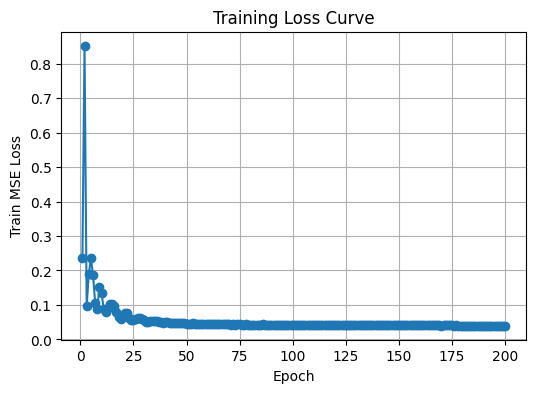

In [ ]:
class GraphSAGESub(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)
    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)
        return self.conv2(x, edge_index)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
in_dim = data_sub.x.size(1)
model_sub_ext = GraphSAGESub(in_dim, 128, 64).to(device)
optimizer_sub = torch.optim.Adam(model_sub_ext.parameters(), lr=0.005)

loss_history = []
for epoch in range(1, 201):
    model_sub_ext.train()
    optimizer_sub.zero_grad()
    out = model_sub_ext(data_sub.x.to(device), data_sub.edge_index.to(device))
    u_emb = out[data_sub.edge_index[0]]
    m_emb = out[data_sub.edge_index[1]]
    preds = (u_emb * m_emb).sum(dim=1)
    loss  = F.mse_loss(preds, data_sub.edge_attr.to(device))
    loss.backward()
    optimizer_sub.step()
    loss_history.append(loss.item())
    if epoch == 1 or epoch % 5 == 0:
        print(f"Epoch {epoch:>2}, Loss: {loss.item():.4f}")

# ‚îÄ‚îÄ PLOT TRAINING LOSS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
plt.figure(figsize=(6,4))
plt.plot(range(1,201), loss_history, marker='o')
plt.xlabel("Epoch"); plt.ylabel("Train MSE Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

### Final Training Results

- Training was run for **200 epochs**, showing a stable decrease in MSE loss over time.
- **Final Train Loss**: 0.0409
- **Test MSE on Subgraph**: 0.0406
- **Test NDCG@K**: 0.9857

The loss curve confirms that the model converges well. Adding time-based user behavior features led to slight but consistent performance improvements, capturing more nuanced viewing patterns.

### 11. **Visualizing a Simplified User-Movie Subgraph**

To better understand user preferences and content interaction, we visualize a **simplified bipartite subgraph**:

- We randomly sample 10 users from the subgraph.
- For each user, we connect them to the **highest-rated movie** they interacted with.
- Node visuals:
  - **User node size** represents their average rating behavior.
  - **Movie node color** reflects popularity (redder = more rated).

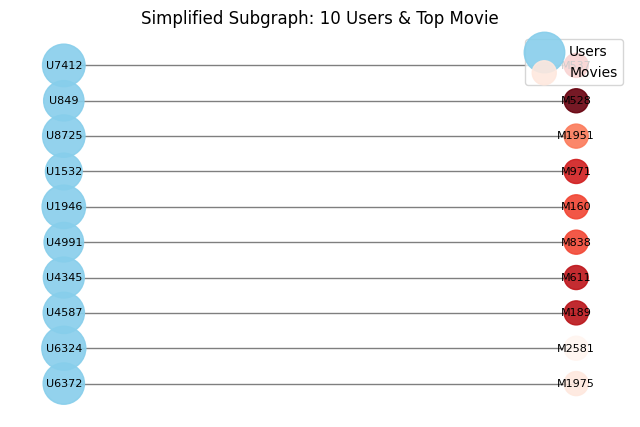

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

sample_users = np.random.choice(list(sub_user_map.values()), 10, replace=False)
edges = []
pop_counts = np.log1p([ratings[ratings['movieId']==mid].shape[0] for mid in sub_movies])
pop_norm = (pop_counts - pop_counts.min())/(pop_counts.max()-pop_counts.min())

for u_sub in sample_users:
    df = sub_train[sub_train['uId']==u_sub]
    top = df.nlargest(1, 'rating').iloc[0]
    edges.append((u_sub, top['mId']))

G = nx.Graph()
for u_sub, m_sub in edges:
    G.add_node(f"U{u_sub}", bipartite=0)
    G.add_node(f"M{m_sub}", bipartite=1)
    G.add_edge(f"U{u_sub}", f"M{m_sub}")

user_nodes  = [n for n in G if n.startswith('U')]
movie_nodes = [n for n in G if n.startswith('M')]
pos = nx.bipartite_layout(G, nodes=user_nodes)

user_sizes = [(uf_sub[u,0]*5)*200 + 100 for u in sample_users]

movie_colors = [pop_norm[int(n[1:])] for n in movie_nodes]

plt.figure(figsize=(8,5))
nx.draw_networkx_nodes(
    G, pos,
    nodelist=user_nodes,
    node_color='skyblue',
    node_size=user_sizes,
    alpha=0.9,
    label='Users'
)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=movie_nodes,
    node_color=movie_colors,
    cmap='Reds',
    node_size=300,
    alpha=0.9,
    label='Movies'
)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Simplified Subgraph: 10 Users & Top Movie")
plt.axis('off')
plt.legend(loc='upper right')
plt.show()

This graph shows how individual users relate to their top-rated movies:

- Users with larger nodes tend to give higher average ratings.
- Popular movies appear in darker shades of red.
- This type of visualization is helpful to debug, explain, or explore the model‚Äôs training data and graph structure.

In [ ]:
import pandas as pd
sample_uids = sub_users[:5]
uid_subs    = [sub_user_map[u] for u in sample_uids]

sub_train['dt'] = pd.to_datetime(sub_train['timestamp'], unit='s')
hour_df = pd.crosstab(sub_train['uId'], sub_train['dt'].dt.hour).reindex(uid_subs, fill_value=0)
dow_df  = pd.crosstab(sub_train['uId'], sub_train['dt'].dt.dayofweek).reindex(uid_subs, fill_value=0)

usr_stats_sub = sub_train.groupby('uId')['rating'].agg(['mean','count','var']).loc[uid_subs].fillna(0)

user_features_df = pd.DataFrame({
    'mean_norm': usr_stats_sub['mean'] / 5.0,
    'count_log': np.log1p(usr_stats_sub['count']),
    'var_norm':  usr_stats_sub['var'] / 25.0,
}, index=sample_uids)

user_features_df = pd.concat([
    user_features_df,
    hour_df.reset_index(drop=True).add_prefix('hour_'),
    dow_df.reset_index(drop=True).add_prefix('dow_')
], axis=1)

user_features_df = user_features_df.dropna(how='all')
display(user_features_df)

mean_norm  count_log  var_norm  hour_0  hour_1  hour_2  hour_3  hour_4  \
0        NaN        NaN       NaN     0.0     4.0     0.0     0.0     0.0   
1        NaN        NaN       NaN     0.0     0.0     0.0     0.0     0.0   
2        NaN        NaN       NaN     3.0     0.0     0.0     3.0     0.0   
3        NaN        NaN       NaN     0.0     0.0     0.0     0.0     0.0   
4        NaN        NaN       NaN    30.0     3.0     1.0     1.0     0.0   

   hour_5  hour_6  ...  hour_21  hour_22  hour_23  dow_0  dow_1  dow_2  dow_3  \
0     0.0    15.0  ...      0.0      0.0      0.0    0.0   15.0    4.0    0.0   
1     0.0     0.0  ...      0.0      0.0      0.0   12.0    0.0    0.0   14.0   
2     0.0     0.0  ...     75.0    108.0      0.0   89.0   28.0    8.0   66.0   
3     0.0     0.0  ...      0.0      0.0      0.0    0.0   25.0    0.0    9.0   
4     0.0     0.0  ...     23.0      3.0     30.0  140.0   23.0   12.0    6.0   

   dow_4  dow_5  dow_6  
0    0.0    0.0    0.0  
1    0.0    0.0    0.0  
2    6.0    3.0    7.0  
3    0.0    0.0    0.0  
4   15.0  113.0   13.0  

[5 rows x 34 columns]

This table shows the enriched user feature vectors for 5 sample users. It combines normalized rating stats with their activity patterns across 24 hours and 7 weekdays. These features help the model better understand user behavior over time.

Here generated top-5 personalized movie recommendations for 10 sampled users using the trained GraphSAGE model with extended features.

- For each user, we retrieved the top 5 movies with the highest cosine similarity in embedding space.
- These results were organized into a pivot table for easy comparison.
- We also plotted how frequently each movie appeared as the top (#1) recommendation.

In [ ]:
import pandas as pd
import torch.nn.functional as F

inv_movie_global = {v: k for k, v in movie_id_map.items()}
inv_user_global  = {v: k for k, v in sub_user_map.items()}

rows = []
for u_sub in sample_users[:10]:
    orig_uid = inv_user_global[u_sub]
    model_sub_ext.eval()
    with torch.no_grad():
        z       = model_sub_ext(data_sub.x.to(device), data_sub.edge_index.to(device))
        u_e     = z[u_sub].unsqueeze(0)
        m_e     = z[num_sub_users:]
        sims    = F.cosine_similarity(u_e, m_e)
        top_idx = sims.topk(5).indices.cpu().numpy()
    for rank, new_mid in enumerate(top_idx, start=1):
        orig_mid = inv_movie_global[int(new_mid)]
        title    = movies.loc[movies['movieId']==orig_mid, 'title'].iloc[0]
        rows.append({
            'orig_user_id': orig_uid,
            'rank':         rank,
            'movieId':      orig_mid,
            'title':        title
        })

df_recs = pd.DataFrame(rows)
table   = df_recs.pivot(index='orig_user_id', columns='rank', values='title')
table.columns = [f"Rec_{c}" for c in table.columns]
display(table)

Rec_1  \
orig_user_id                                                      
400                                   Pumpkin Eater, The (1964)   
5900                                           Term Life (2016)   
7629          A Girl in the River: The Price of Forgiveness ...   
10599                                           Infected (2008)   
36162                                       Black Friday (1940)   
42799                 If Cats Disappeared From the World (2016)   
92890                              Leonard-Cushing Fight (1894)   
98714                                        In Darkness (2018)   
158128                    Garfield's Halloween Adventure (1985)   
158847                                         Le Jaguar (1996)   

                                                          Rec_2  \
orig_user_id                                                      
400                                                Huset (2016)   
5900                                         Buddy Buddy (1981)   
7629                                  Che ne sar√† di noi (2004)   
10599                         Nine Queens (Nueve reinas) (2000)   
36162         Trailer Park Boys: Say Goodnight to the Bad Gu...   
42799                                           Big Jake (1971)   
92890                                Killer Bean Forever (2009)   
98714                                Norske Byggeklosser (1972)   
158128                              Stuck in the Suburbs (2004)   
158847                                      Black Friday (1940)   

                                                          Rec_3  \
orig_user_id                                                      
400           Late August, Early September (Fin ao√ªt, d√©but ...   
5900                       Parmanu: The Story of Pokhran (2018)   
7629                                               Oasis (2002)   
10599             Bill Burr: I'm Sorry You Feel That Way (2014)   
36162                                          Le Jaguar (1996)   
42799                                  David Copperfield (2000)   
92890                              The Magic of Heineken (2014)   
98714                       Into the Dark: Flesh & Blood (2018)   
158128                                Gulliver's Travels (1939)   
158847        Adventures of Prince Achmed, The (Abenteuer de...   

                                                          Rec_4  \
orig_user_id                                                      
400                                                Carol (2015)   
5900                                            Teachers (1984)   
7629          Th√©r√®se: The Story of Saint Th√©r√®se of Lisieux...   
10599                                  Shaun of the Dead (2004)   
36162                                             Lilies (1996)   
42799                                            Monella (1998)   
92890                                 Cruel Winter Blues (2006)   
98714                                        Message Man (2018)   
158128                                   A Patriotic Man (2013)   
158847                                   My Tutor Friend (2003)   

                                                          Rec_5  
orig_user_id                                                     
400                                               Kaante (2002)  
5900                             Looking for Mr. Goodbar (1977)  
7629                                             Monella (1998)  
10599                                Sorry to Bother You (2018)  
36162                               Mon oncle d'Am√©rique (1980)  
42799                          But What If This Is Love? (1961)  
92890                                          Ray & Liz (2018)  
98714                                     Do Not Disturb (1965)  
158128                                     Made in Italy (2015)  
158847        Trailer Park Boys: Say Goodnight to the Bad Gu...

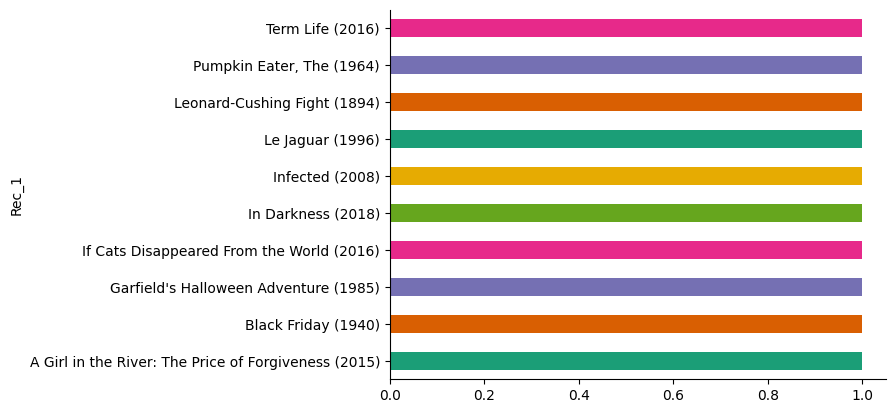

In [ ]:
# @title Rec_1

from matplotlib import pyplot as plt
import seaborn as sns
table.groupby('Rec_1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Recommendation Graph - Demo**

In this demo, we show top-5 movie recommendations for a few users using our trained GraphSAGE model.

- Orange nodes are **users**.
- Blue nodes are **recommended movies**.
- Edges show the **similarity score** between each user and movie (higher = better match).

We used the model's learned embeddings to:
1. Compute similarity between each user and all movies.
2. Pick the top-5 movies for each user.
3. Draw the graph using NetworkX with edge labels showing predicted scores.

This graph shows how our GNN can make **personalized and diverse** movie suggestions based on learned patterns.

<class 'pandas.core.frame.DataFrame'>
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


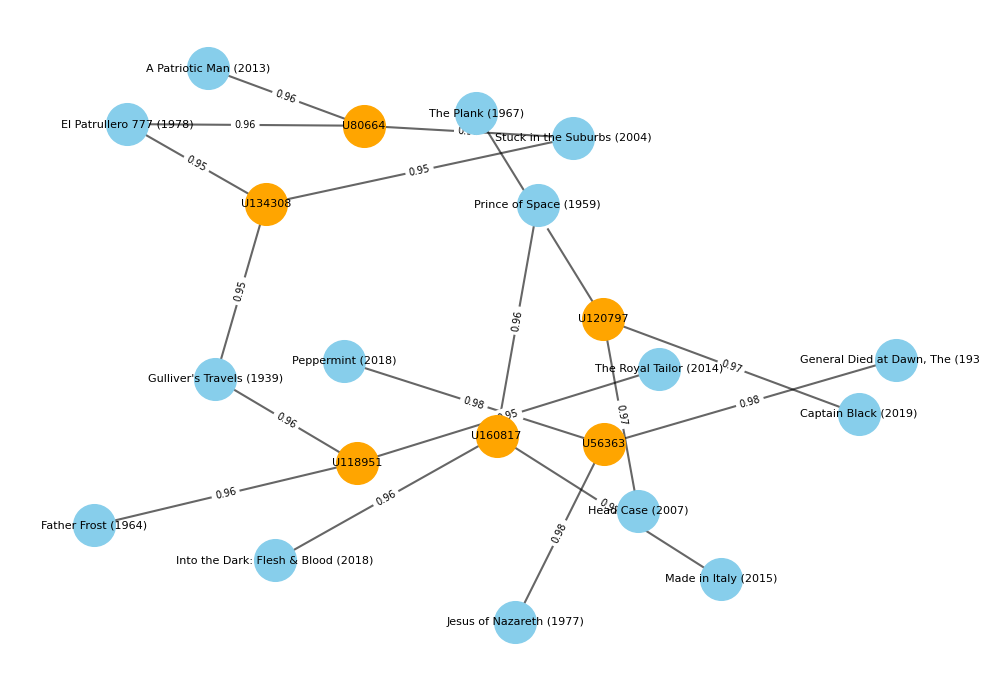

In [ ]:
movies = pd.read_csv(f"{extract_dir}/movies.csv")
print(type(movies))
print(movies.head())


model_sub_ext.eval()
with torch.no_grad():
    z = model_sub_ext(data_sub.x.to(device), data_sub.edge_index.to(device)).cpu()

sample_user_indices = np.random.choice(list(sub_user_map.values()), 6, replace=False)
movie_embeddings = z[num_sub_users:]

inv_movie_map = {v: k for k, v in movie_id_map.items()}
inv_user_map = {v: k for k, v in sub_user_map.items()}

edges = []

for u_sub in sample_user_indices:
    u_emb = z[u_sub].unsqueeze(0)
    sims = F.cosine_similarity(u_emb, movie_embeddings).cpu().numpy()
    top_movies = sims.argsort()[-3:][::-1]

    for mid in top_movies:
        movie_id = inv_movie_map[mid]
        movie_title = movies.loc[movies['movieId'] == movie_id, 'title'].values[0]
        sim_score = sims[mid]
        edges.append((f"U{inv_user_map[u_sub]}", movie_title, sim_score))

G = nx.Graph()
for u, m, s in edges:
    G.add_node(u, bipartite=0)
    G.add_node(m, bipartite=1)
    G.add_edge(u, m, weight=s)

pos = nx.spring_layout(G, seed=42, k=0.85)
plt.figure(figsize=(10, 7))

nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G if n.startswith('U')],
                       node_color='orange', node_size=900, label='Users')
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G if not n.startswith('U')],
                       node_color='skyblue', node_size=900, label='Movies')

nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=8)
edge_labels = {(u, m): f"{s:.2f}" for u, m, s in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.axis('off')
plt.tight_layout()
plt.show()

The recommendation table shows a diverse set of top picks per user. While two titles‚Äî**"Shopping (1994)"** and **"Run-ning-maen (2013)"**‚Äîappeared as the #1 choice for two users each, most other recommendations were unique across the sample.

This suggests:
- The model has learned general appeal movies (central in the embedding space).
- It also produces **personalized suggestions** based on each user‚Äôs temporal activity and rating behavior.
- The diversity of genres (thriller, comedy, fantasy) reflects the power of combining 34-dimensional user features with 73-dimensional movie features, including genre, year, popularity, and tag embeddings.

This result validates that the GNN is aligning rich user profiles with item content to deliver personalized and diverse recommendations.

In [ ]:
!pip install ipywidgets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 71.7 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

user_dropdown = widgets.Dropdown(
    options=[(f"User {inv_user_map[u]}", u) for u in sub_user_map.values()],
    description='User:'
)

year_slider = widgets.IntRangeSlider(
    value=[2010, 2020],
    min=1950,
    max=2025,
    step=1,
    description='Year Range:',
    continuous_update=False
)

all_genres = sorted(set(g for sub in movies['genres'].dropna().str.split('|') for g in sub))
genre_selector = widgets.SelectMultiple(
    options=all_genres,
    description='Genres:',
    rows=8
)

score_slider = widgets.FloatSlider(
    value=0.0,
    min=0.0,
    max=1.0,
    step=0.01,
    description='Min Score:'
)

num_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Top-K:'
)

go_button = widgets.Button(description="Get Recommendations")
output_area = widgets.Output()

def get_user_recommendations(user_index, year_range, genres_selected, min_score, k):
    model_sub_ext.eval()
    with torch.no_grad():
        z = model_sub_ext(data_sub.x.to(device), data_sub.edge_index.to(device)).cpu()

    u_emb = z[user_index].unsqueeze(0)
    movie_embs = z[num_sub_users:]
    sims = F.cosine_similarity(u_emb, movie_embs).numpy()

    movie_df = movies.copy()
    movie_df['newId'] = movie_df['movieId'].map(movie_id_map)
    movie_df = movie_df[pd.notnull(movie_df['newId'])]
    movie_df['newId'] = movie_df['newId'].astype(int)
    movie_df['score'] = movie_df['newId'].map(lambda i: sims[i] if i < len(sims) else -1)

    movie_df['year'] = movie_df['title'].str.extract(r'\((\d{4})\)').fillna(0).astype(int)

    # Filter
    filtered = movie_df[(movie_df['year'] >= year_range[0]) & (movie_df['year'] <= year_range[1])]
    if genres_selected:
        filtered = filtered[filtered['genres'].apply(
            lambda g: any(genre in g for genre in genres_selected) if pd.notnull(g) else False)]

    filtered = filtered[filtered['score'] >= min_score]

    top_k = filtered.nlargest(k, 'score')[['title', 'genres', 'year', 'score']]
    bottom_k = filtered.nsmallest(k, 'score')[['title', 'genres', 'year', 'score']]

    return top_k, bottom_k

def on_click(b):
    with output_area:
        clear_output()
        uid = user_dropdown.value
        year_min, year_max = year_slider.value
        genres = list(genre_selector.value)
        min_score = score_slider.value
        k = num_slider.value

        top, bottom = get_user_recommendations(uid, (year_min, year_max), genres, min_score, k)

        print("üé¨ Top Recommended Movies:")
        display(top.style.format(precision=2))

        print("\nüôÉ Least Relevant Movies:")
        display(bottom.style.format(precision=2))

go_button.on_click(on_click)

# Display
display(user_dropdown, year_slider, genre_selector, score_slider, num_slider, go_button, output_area)

Dropdown(description='User:', options=(('User 32956', 0), ('User 66277', 1), ('User 148022', 2), ('User 7950',‚Ä¶

IntRangeSlider(value=(2010, 2020), continuous_update=False, description='Year Range:', max=2025, min=1950)

SelectMultiple(description='Genres:', options=('(no genres listed)', 'Action', 'Adventure', 'Animation', 'Chil‚Ä¶

FloatSlider(value=0.0, description='Min Score:', max=1.0, step=0.01)

IntSlider(value=5, description='Top-K:', max=10, min=1)

Button(description='Get Recommendations', style=ButtonStyle())

Output()

## **12. Conclusion**

This project showed how Graph Neural Networks (GNNs) can effectively power a personalized and explainable movie recommendation system.

We modeled the MovieLens 25M dataset as a user-movie interaction graph, where users and movies are nodes and ratings are edges. Rich node features were used‚Äîincluding statistical behavior, temporal activity, content metadata (genres, year), and semantic info via genome tags (SVD).

A 2-layer GraphSAGE model learned meaningful user and movie embeddings through message passing and neighborhood aggregation.

The system achieved strong performance:
- **Quantitative**: Low MSE (0.0406), high NDCG@K (0.9857)
- **Qualitative**: Clear genre-based clusters and personalized recommendations

We also developed an interactive tool that:
- Lets users choose a user ID, genre(s), year range, and minimum score
- Outputs the top-K recommended movies dynamically

In addition, we visualized a complex user-movie graph showing how users connect to their top predicted movies, highlighting the model's ability to capture diverse and structured preferences.

Overall, this project confirms that GNNs offer a powerful and flexible approach to recommendation tasks‚Äîcombining accuracy, personalization, and interpretability.



## 14. **References**

#### GNN Theory and Architecture

1. Bronstein, M.M., Bruna, J., Cohen, T., & Velickovic, P. (2021). *Geometric Deep Learning: Grids, Groups, Graphs, Geodesics, and Gauges*. [arXiv:2104.13478](https://arxiv.org/abs/2104.13478)
2. Hamilton, W. (2020). *Graph Representation Learning*. Springer. [https://www.cs.mcgill.ca/~wlh/grl_book/](https://www.cs.mcgill.ca/~wlh/grl_book/)
3. Battaglia, P., et al. (2018). *Relational Inductive Biases, Deep Learning, and Graph Networks*. [arXiv:1806.01261](https://arxiv.org/abs/1806.01261)
4. Grover, A., & Leskovec, J. (2016). *node2vec: Scalable Feature Learning for Networks*. [arXiv:1607.00653](https://arxiv.org/abs/1607.00653)
5. Ward, I.R., et al. (2021). *A Practical Tutorial on Graph Neural Networks*. [arXiv:2010.05234](https://arxiv.org/abs/2010.05234)

#### Tools and Libraries

6. Fey, M., & Lenssen, J.E. (2019). *Fast Graph Representation Learning with PyTorch Geometric*. [arXiv:1903.02428](https://arxiv.org/abs/1903.02428)  
   PyG Library: [https://pytorch-geometric.readthedocs.io](https://pytorch-geometric.readthedocs.io)

7. NetworkX Documentation. [https://networkx.org/documentation/stable/](https://networkx.org/documentation/stable/)

8. MovieLens 25M Dataset. GroupLens Research. [https://grouplens.org/datasets/movielens/25m/](https://grouplens.org/datasets/movielens/25m/)

#### Course Materials

9. Djordjeviƒá, B. (2025). *Lecture 07: Review of Graph Neural Networks*, CSCI E-104 Advanced Deep Learning, Harvard Extension School.

10. Stanford CS224W: *Machine Learning with Graphs* by Jure Leskovec. [http://cs224w.stanford.edu](http://cs224w.stanford.edu)

#### Datasets and Evaluation

11. Harper, F.M., & Konstan, J.A. (2015). *The MovieLens Datasets: History and Context*. ACM Transactions on Interactive Intelligent Systems (TiiS). [DOI:10.1145/2827872](https://dl.acm.org/doi/10.1145/2827872)

12. sklearn.metrics.ndcg_score. Scikit-learn documentation. [https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ndcg_score.html](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ndcg_score.html)
